<a href="https://colab.research.google.com/github/maviayten/1_proje/blob/main/makine_ogrenmesi_odev_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Makine Öğrenmesi 3. Ödev

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine

%matplotlib inline
sns.set_style('whitegrid')

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.sample(15)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0,2
18,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
112,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607.0,1
124,11.87,4.31,2.39,21.0,82.0,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380.0,1
54,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0,0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0,1
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,0
20,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0,0


In [2]:
bazı_istatistikler = df.describe()

print(bazı_istatistikler)

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [3]:
df['target'].value_counts(
   normalize=True
)

,proportion
target,
1,0.398876
0,0.331461
2,0.269663


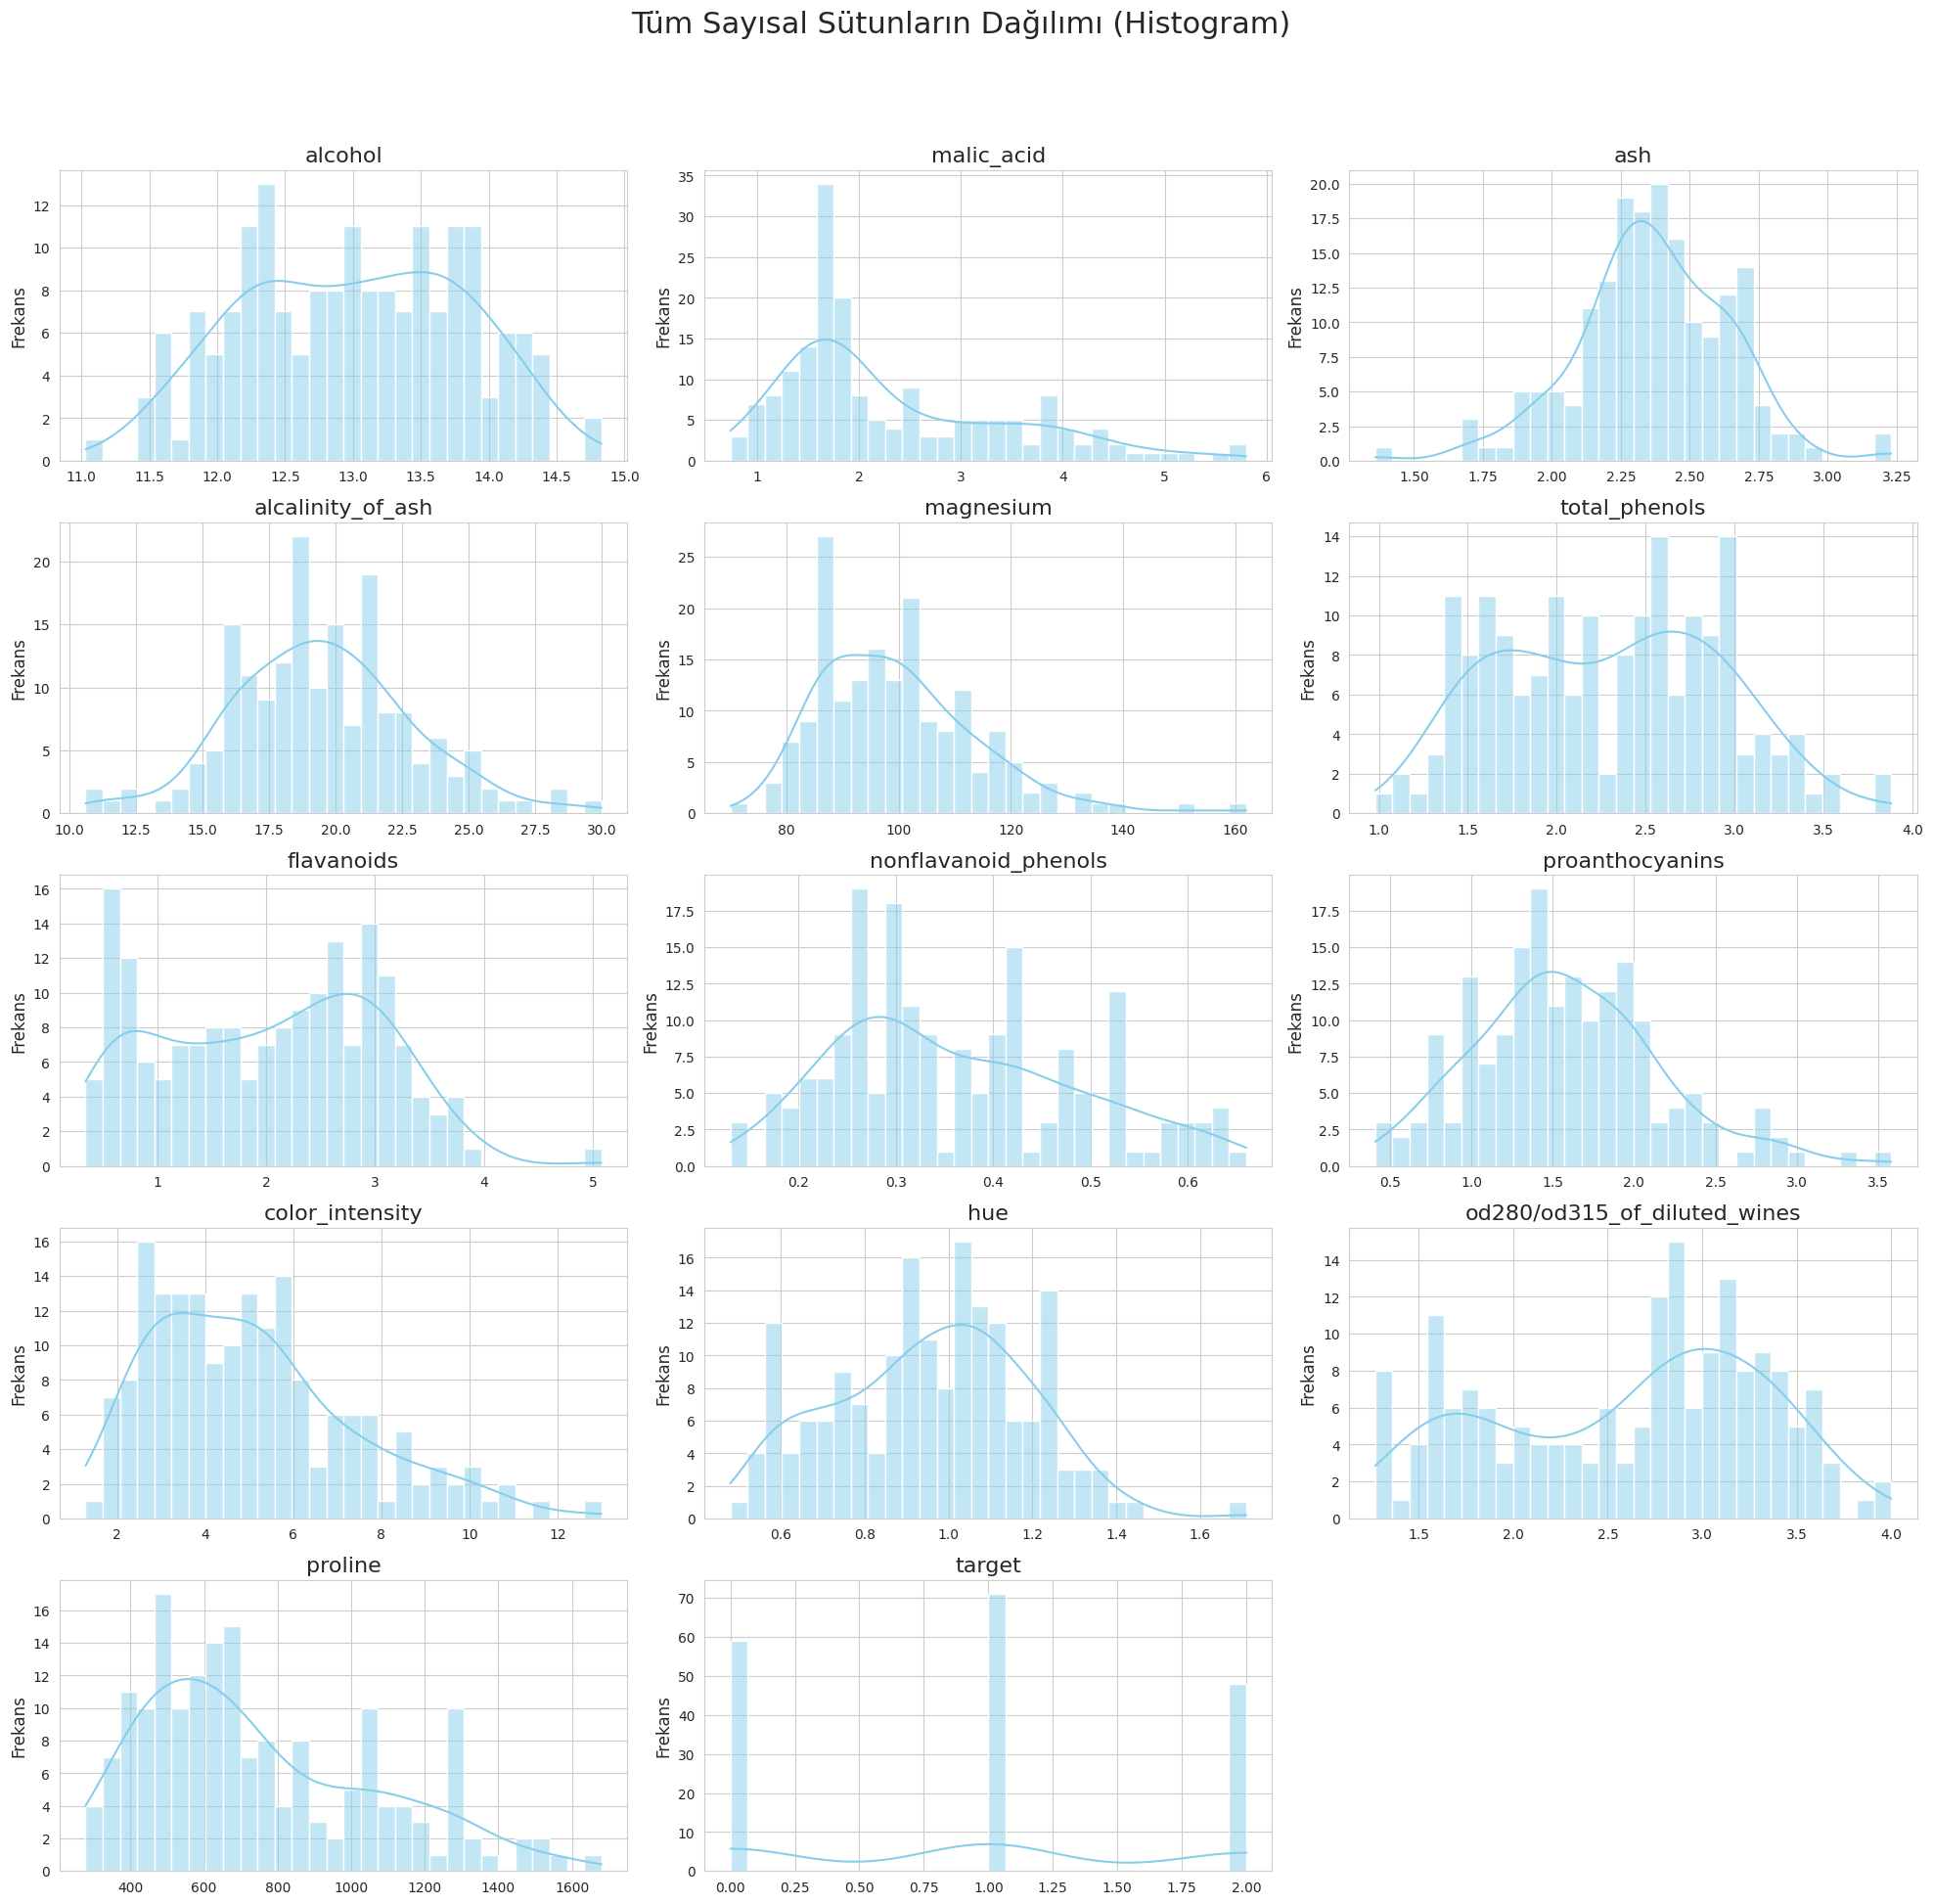

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,40))
fig.suptitle('Tüm Sayısal Sütunların Dağılımı (Histogram)', fontsize=22, y=1.02)
veri_tipleri=df.dtypes

sayisal_sutunlar = veri_tipleri[veri_tipleri != 'object'].index.tolist()


for i,sutun in enumerate(sayisal_sutunlar,1):
    plt.subplot(11,3,i)
    sns.histplot(df[sutun],bins=30,kde=True,color='skyblue')
    plt.title(f'{sutun}',fontsize=16)
    plt.xlabel('')
    plt.ylabel('Frekans',fontsize=12)

plt.tight_layout()
plt.show()

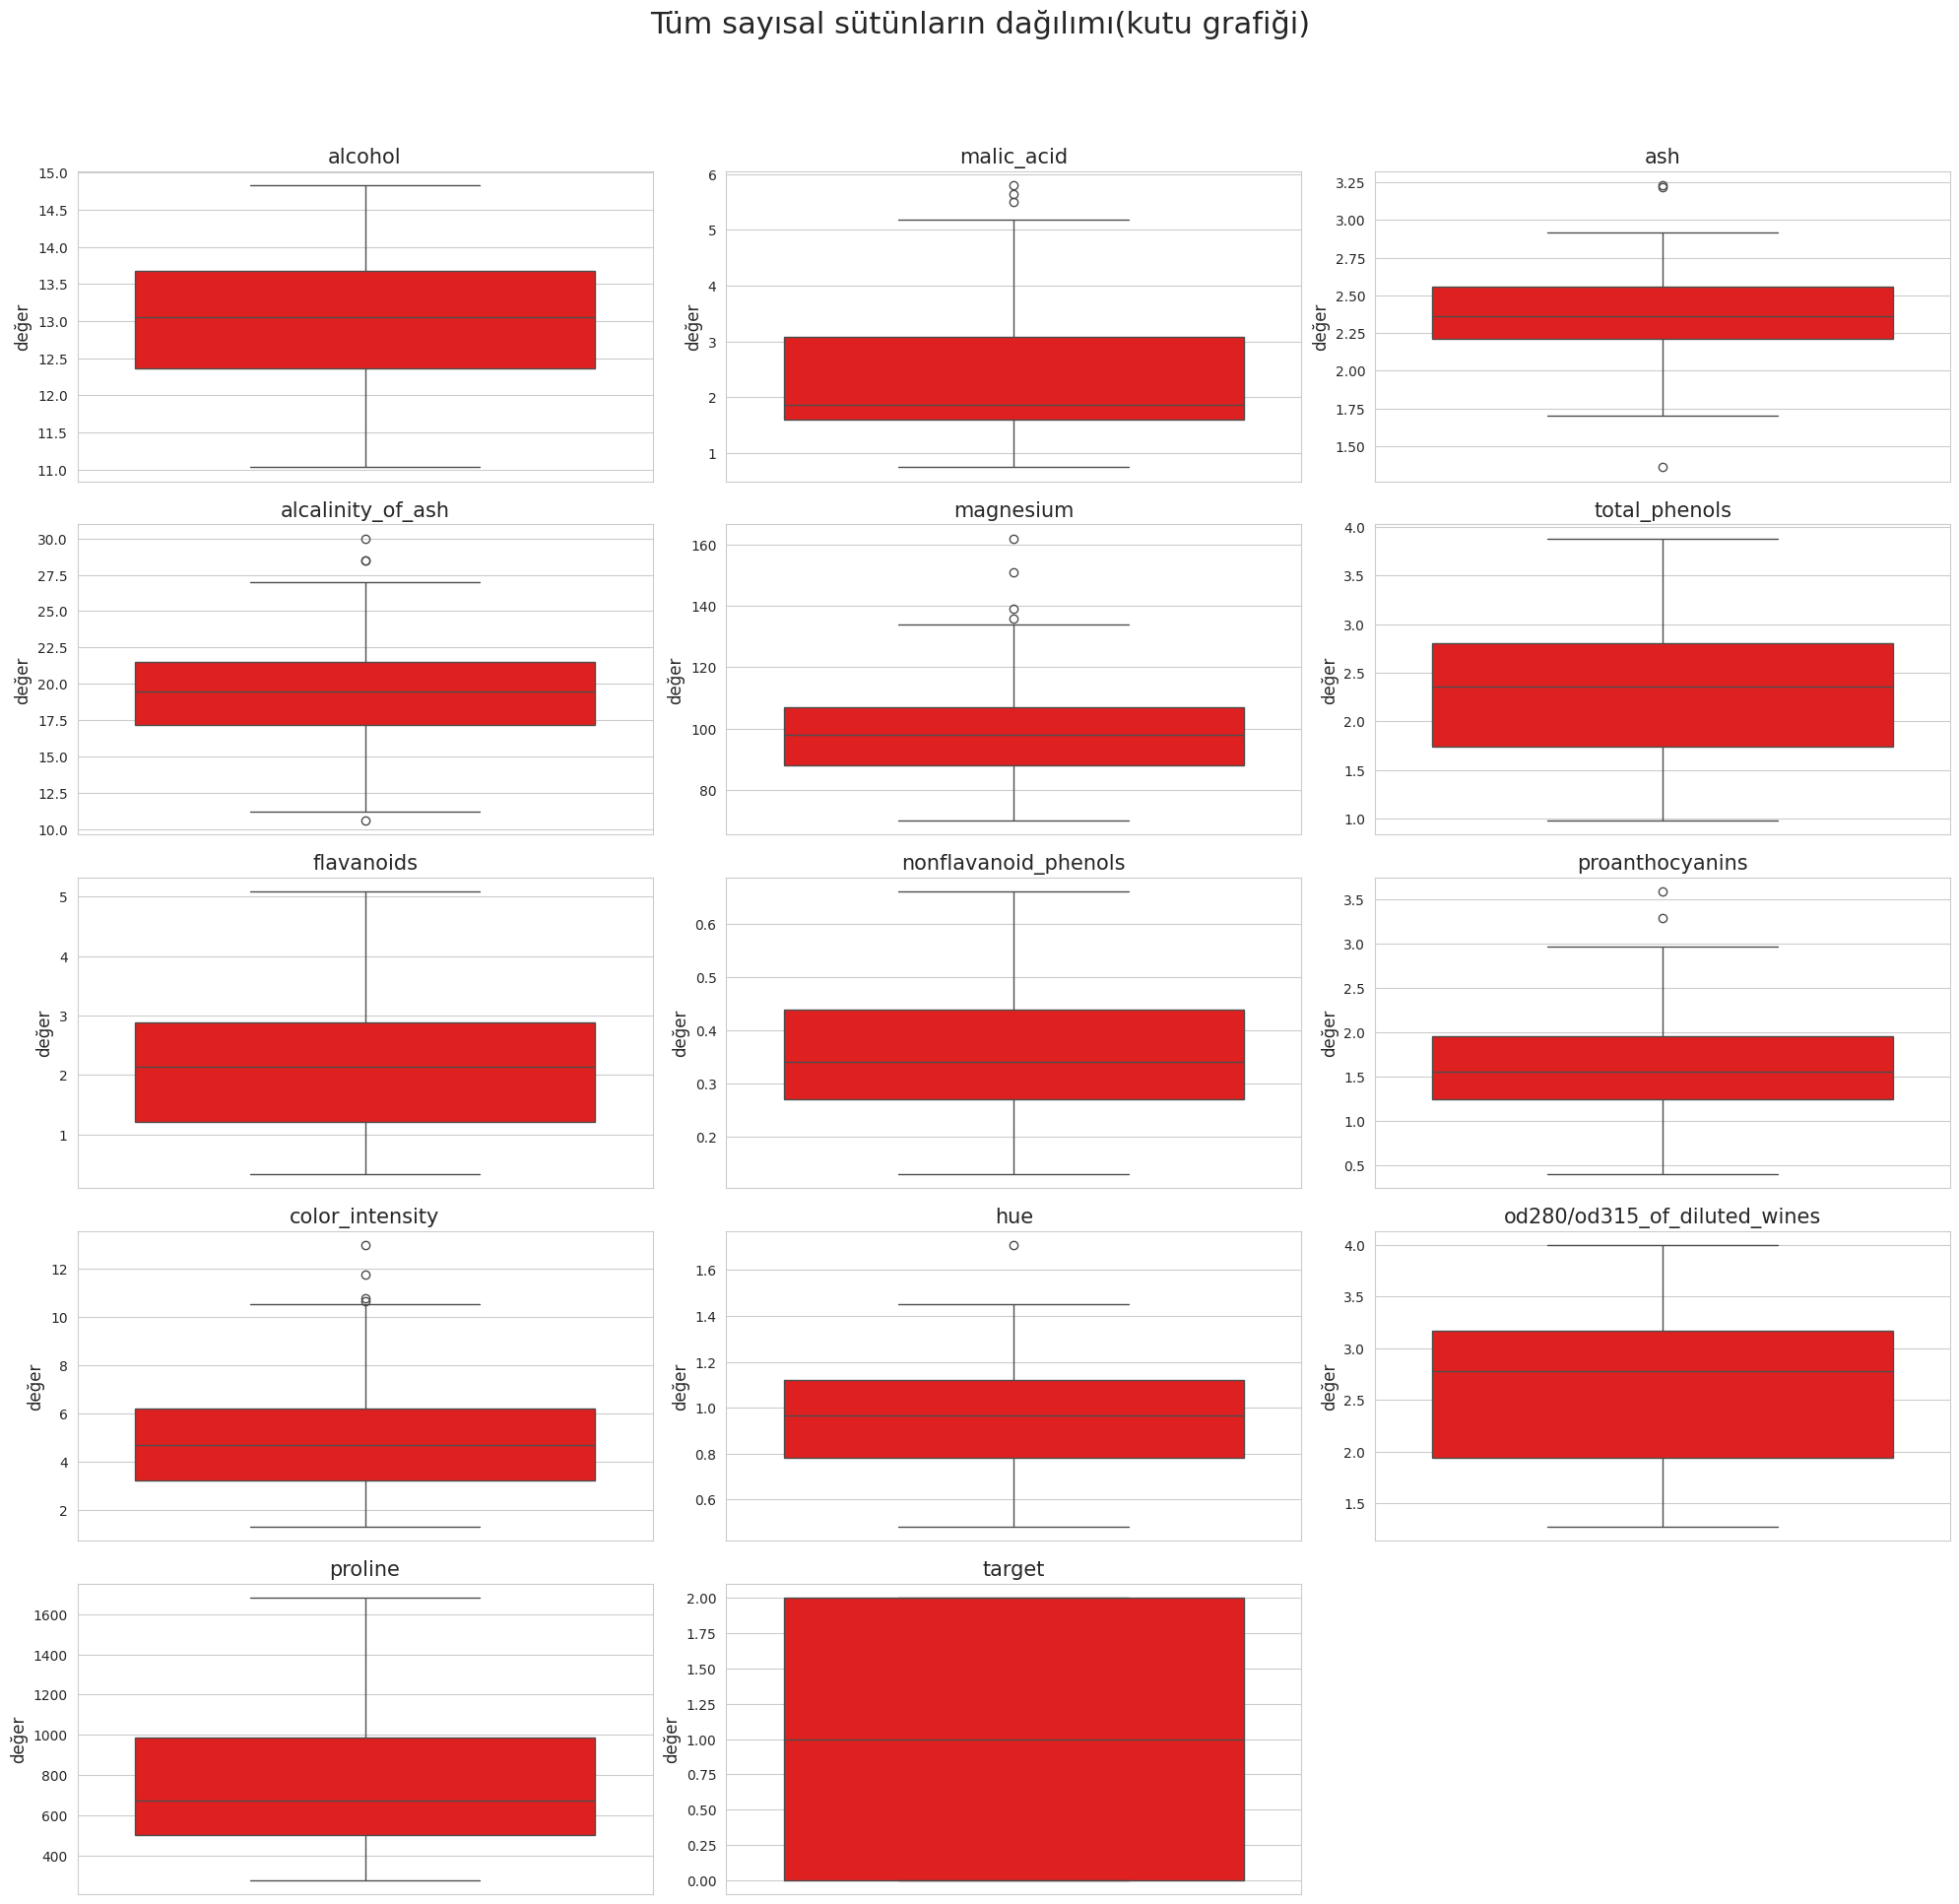

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,40))
fig.suptitle('Tüm sayısal sütünların dağılımı(kutu grafiği)',fontsize=22,y=1.02)

for i,sutun in enumerate(sayisal_sutunlar,1):
    plt.subplot(11,3,i)
    sns.boxplot(data=df[sutun],color='red')
    plt.title(f'{sutun}',fontsize=15)
    plt.xlabel('')
    plt.ylabel('değer',fontsize=12)


plt.tight_layout()
plt.show()

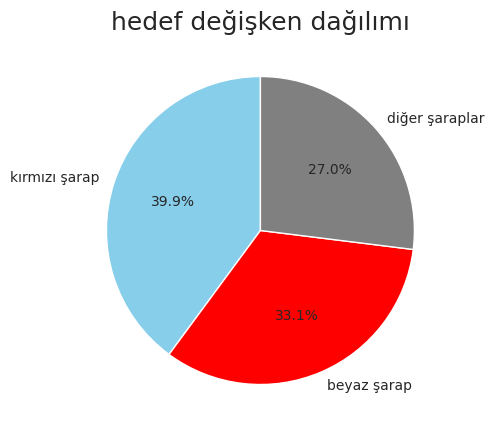

In [6]:
fig = plt.figure(figsize=(5,5))
plt.pie(df['target'].value_counts(),labels=['kırmızı şarap','beyaz şarap','diğer şaraplar'],
       autopct='%1.1f%%',startangle=90,colors=['skyblue','red','grey'])
plt.title('hedef değişken dağılımı',fontsize=18)
plt.show()

<ipython-input-7-46fe16b43c76>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette=['skyblue', 'red', 'grey'])


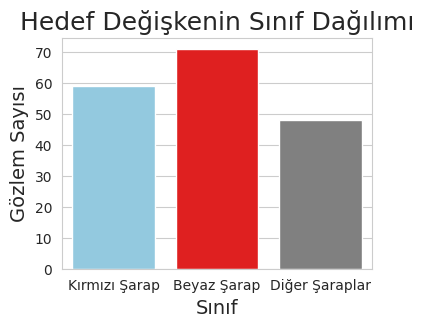

In [7]:
fig = plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='target', palette=['skyblue', 'red', 'grey'])

plt.xticks(ticks=[0, 1, 2], labels=['Kırmızı Şarap', 'Beyaz Şarap', 'Diğer Şaraplar'])
plt.title('Hedef Değişkenin Sınıf Dağılımı', fontsize=18)
plt.xlabel('Sınıf', fontsize=14)
plt.ylabel('Gözlem Sayısı', fontsize=14)
plt.show()

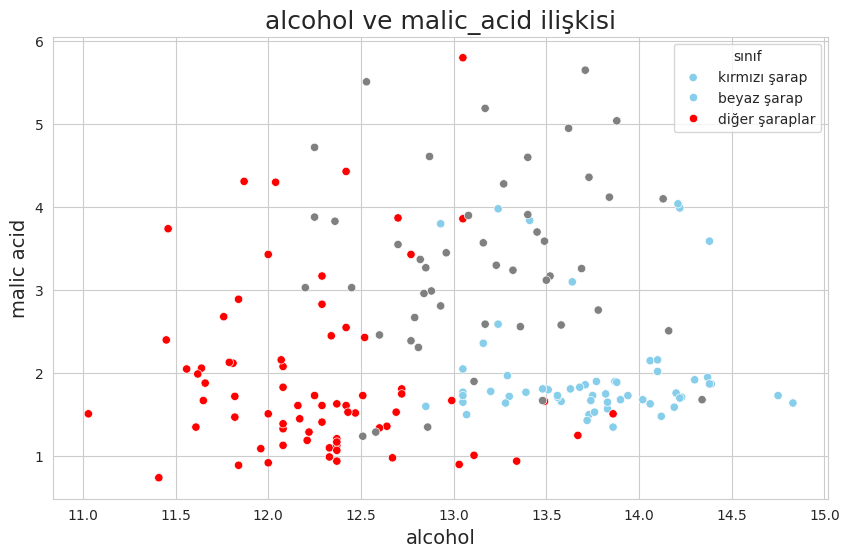

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='alcohol', y='malic_acid', hue='target', palette=['skyblue', 'red', 'grey'])

plt.title('alcohol ve malic_acid ilişkisi',fontsize=18)
plt.xlabel('alcohol',fontsize=14)
plt.ylabel('malic acid',fontsize=14)
plt.legend(title='sınıf',labels=['kırmızı şarap','beyaz şarap','diğer şaraplar'])
plt.show()

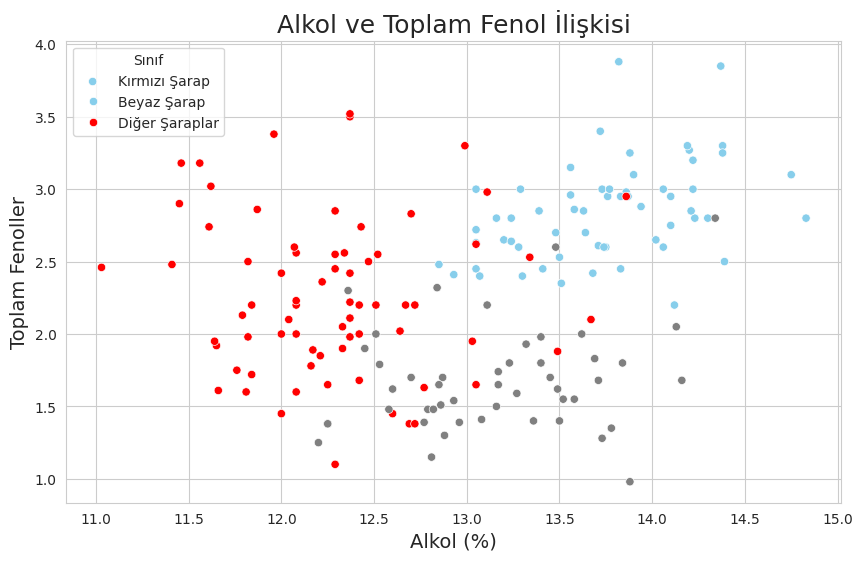

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='alcohol', y='total_phenols', hue='target', palette=['skyblue', 'red', 'grey'])

plt.title('Alkol ve Toplam Fenol İlişkisi', fontsize=18)
plt.xlabel('Alkol (%)', fontsize=14)
plt.ylabel('Toplam Fenoller', fontsize=14)
plt.legend(title='Sınıf', labels=['Kırmızı Şarap', 'Beyaz Şarap', 'Diğer Şaraplar'])
plt.show()

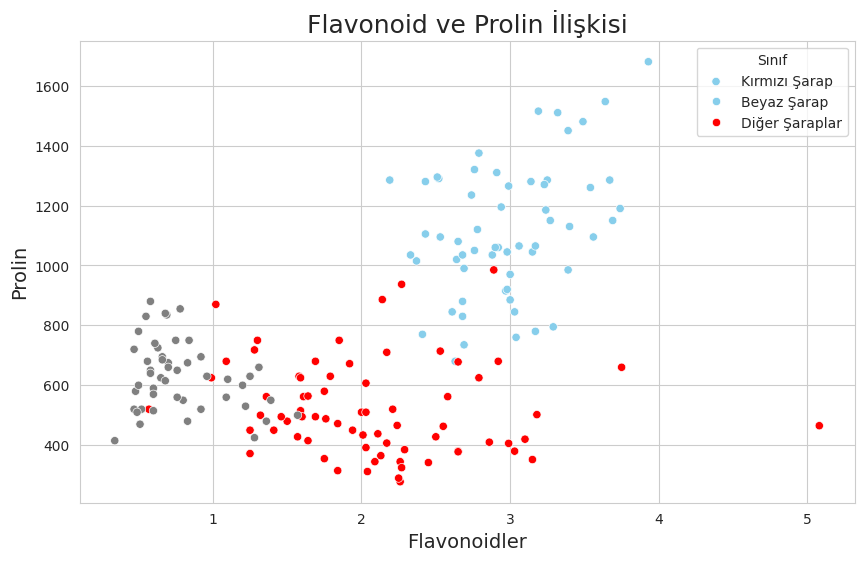

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='flavanoids', y='proline', hue='target', palette=['skyblue', 'red', 'grey'])

plt.title('Flavonoid ve Prolin İlişkisi', fontsize=18)
plt.xlabel('Flavonoidler', fontsize=14)
plt.ylabel('Prolin', fontsize=14)
plt.legend(title='Sınıf', labels=['Kırmızı Şarap', 'Beyaz Şarap', 'Diğer Şaraplar'])
plt.show()

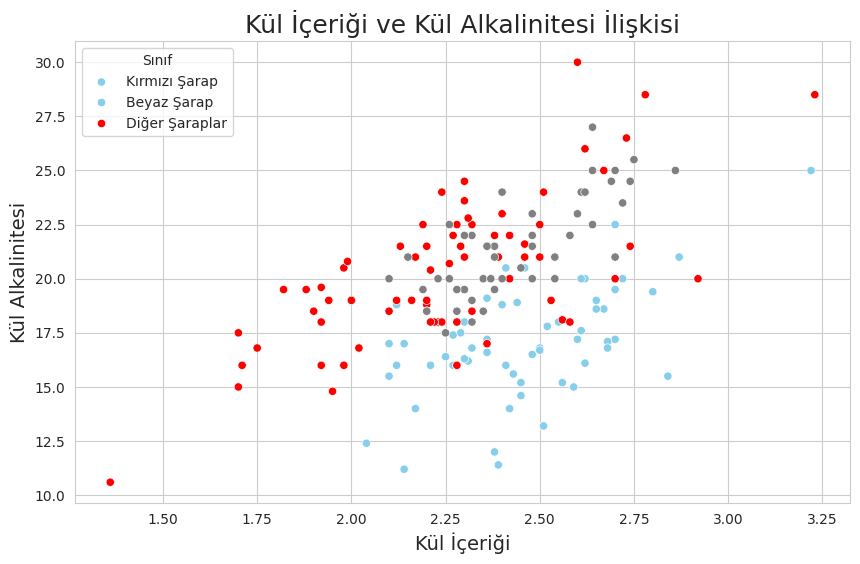

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ash', y='alcalinity_of_ash', hue='target', palette=['skyblue', 'red', 'grey'])

plt.title('Kül İçeriği ve Kül Alkalinitesi İlişkisi', fontsize=18)
plt.xlabel('Kül İçeriği', fontsize=14)
plt.ylabel('Kül Alkalinitesi', fontsize=14)
plt.legend(title='Sınıf', labels=['Kırmızı Şarap', 'Beyaz Şarap', 'Diğer Şaraplar'])
plt.show()

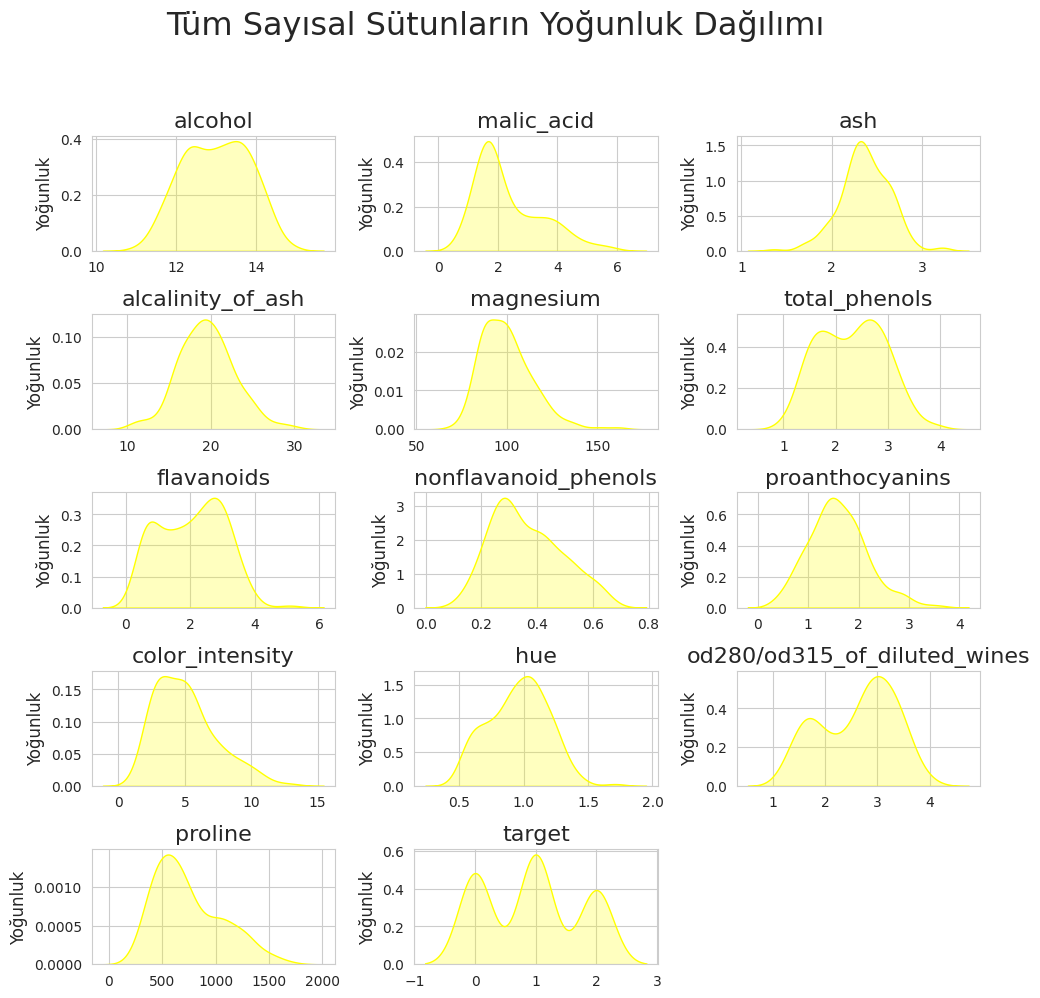

In [12]:
fig = plt.figure(figsize=(10, 20))
fig.suptitle('Tüm Sayısal Sütunların Yoğunluk Dağılımı', fontsize=23, y=1.02)

for i, sutun in enumerate(sayisal_sutunlar, 1):
    plt.subplot(11, 3, i)
    sns.kdeplot(df[sutun], fill=True, color='yellow')
    plt.title(f'{sutun}', fontsize=16)
    plt.xlabel('')
    plt.ylabel('Yoğunluk', fontsize=12)

plt.tight_layout()
plt.show()

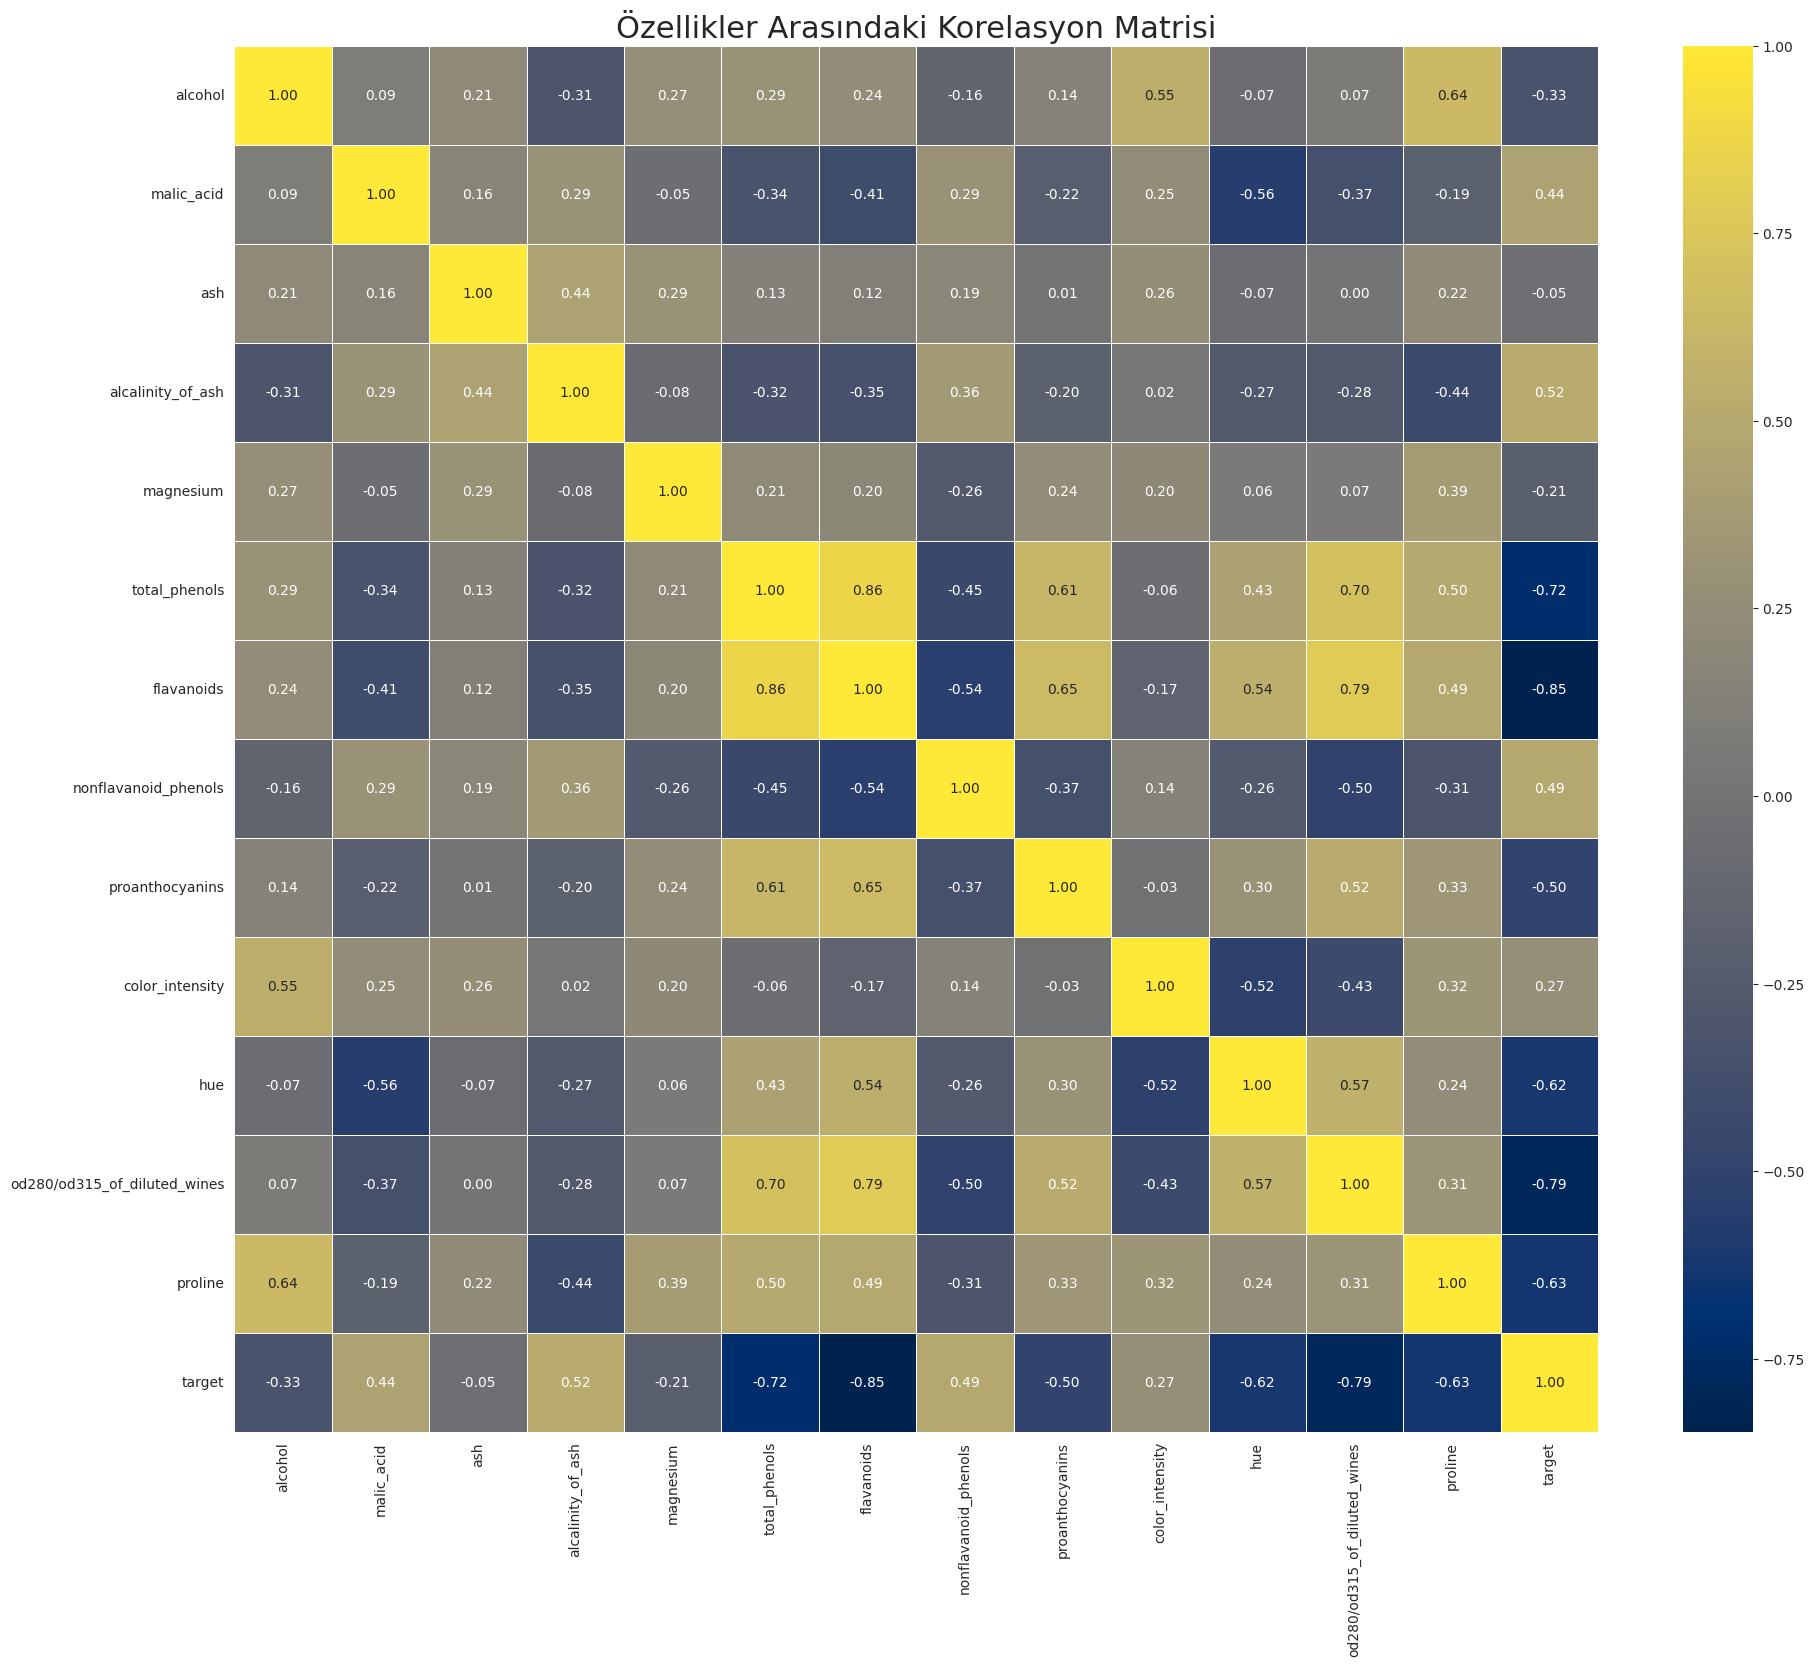

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

korelasyon_matrisi = df.corr()
plt.figure(figsize=(22, 18))

sns.heatmap(korelasyon_matrisi, annot=True, cmap='cividis', linewidths=0.5, fmt=".2f")
plt.title('Özellikler Arasındaki Korelasyon Matrisi', fontsize=22)
plt.show()


In [14]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [15]:
eksik_degerler=df.isnull().sum()
print(eksik_degerler)

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [16]:
def aykiri_deger_sayisi(veri, sutun):
    Q1 = veri[sutun].quantile(0.25)
    Q3 = veri[sutun].quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR
    aykiri_degerler = veri[(veri[sutun] < alt_sinir) | (veri[sutun] > ust_sinir)]
    return len(aykiri_degerler)


aykiri_ozet = pd.DataFrame({
    'Sütun': df.columns,
    'Aykırı Değer Sayısı': [aykiri_deger_sayisi(df, sutun) for sutun in df.columns],
    'Aykırı Değer Yüzdesi (%)': [aykiri_deger_sayisi(df, sutun) / len(df) * 100 for sutun in df.columns]
})


aykiri_ozet = aykiri_ozet[aykiri_ozet['Aykırı Değer Sayısı'] > 0].sort_values(by='Aykırı Değer Sayısı', ascending=False)

aykiri_ozet

,Sütun,Aykırı Değer Sayısı,Aykırı Değer Yüzdesi (%)
3,alcalinity_of_ash,4,2.247191
4,magnesium,4,2.247191
9,color_intensity,4,2.247191
1,malic_acid,3,1.685393
2,ash,3,1.685393
8,proanthocyanins,2,1.123596
10,hue,1,0.561798


In [17]:
for sutun in df.columns:
    Q1 = df[sutun].quantile(0.25)
    Q3 = df[sutun].quantile(0.75)
    IQR = Q3 - Q1


    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR


    df[sutun] = np.where(df[sutun] < alt_sinir, alt_sinir, df[sutun])
    df[sutun] = np.where(df[sutun] > ust_sinir, ust_sinir, df[sutun])


ozet_istatistikler_tum = df.describe()


print(ozet_istatistikler_tum)


          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.330435    2.366721          19.478090   99.483146   
std      0.811827    1.100173    0.263705           3.287757   13.414186   
min     11.030000    0.740000    1.688750          10.750000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.302500    3.078750          27.950000  135.500000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.586067   
std         0.625851    0.998859              0.124453         0.558153   
min         0.9

In [18]:
import numpy as np


carpik_ozellikler = df.skew().sort_values(ascending=True)


yuksek_carpiklik = carpik_ozellikler[carpik_ozellikler > 0.75].index


for sutun in yuksek_carpiklik:
    df[sutun] = np.log1p(df[sutun])

donusum_sonrasi_carpiklik = df[yuksek_carpiklik].skew()


donusum_sonrasi_carpiklik

,0
proline,0.087930
malic_acid,0.500235


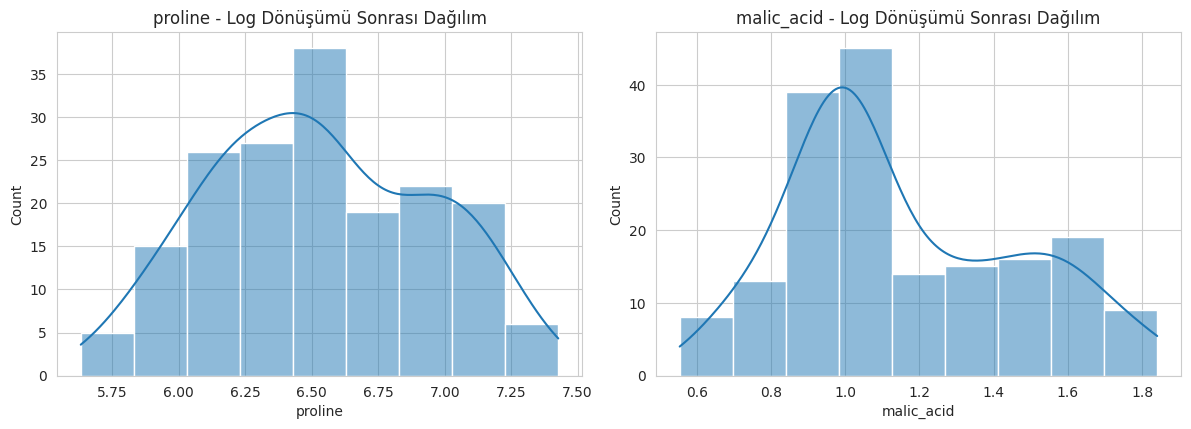

In [19]:
#logaritma görselleştirmesi(ders de ek olarak istediniz.)

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(18, 12))
for i, sutun in enumerate(yuksek_carpiklik, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[sutun], kde=True)
    plt.title(f'{sutun} - Log Dönüşümü Sonrası Dağılım')

plt.tight_layout()
plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df.drop(columns=['target'])
y = df['target']


scaler = StandardScaler()
X_standart = scaler.fit_transform(X)


X_egitim, X_test, y_egitim, y_test = train_test_split(X_standart, y, test_size=0.3, random_state=42)

X_egitim.shape, X_test.shape


((124, 13), (54, 13))

In [21]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


knn_model = KNeighborsClassifier(n_neighbors=2, weights='uniform', metric='euclidean')


knn_model.fit(X_egitim, y_egitim)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [22]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_egitim_tahmin = knn_model.predict(X_egitim)
y_test_tahmin = knn_model.predict(X_test)

egitim_f1 = f1_score(y_egitim, y_egitim_tahmin, average='macro')
test_f1 = f1_score(y_test, y_test_tahmin, average='macro')

egitim_hassasiyet = precision_score(y_egitim, y_egitim_tahmin, average='macro')
test_hassasiyet = precision_score(y_test, y_test_tahmin, average='macro')

egitim_duyarlilik = recall_score(y_egitim, y_egitim_tahmin, average='macro')
test_duyarlilik = recall_score(y_test, y_test_tahmin, average='macro')

egitim_dogruluk = accuracy_score(y_egitim, y_egitim_tahmin)
test_dogruluk = accuracy_score(y_test, y_test_tahmin)

skorlar_df = pd.DataFrame({
    'Skor': ['Doğruluk (Accuracy)', 'Hassasiyet (Precision)', 'Duyarlılık (Recall)', 'F1 Skoru (F1 Score)'],
    'Eğitim Kümesi': [egitim_dogruluk, egitim_hassasiyet, egitim_duyarlilik, egitim_f1],
    'Test Kümesi': [test_dogruluk, test_hassasiyet, test_duyarlilik, test_f1]
})

print(skorlar_df)


                     Skor  Eğitim Kümesi  Test Kümesi
0     Doğruluk (Accuracy)       0.959677     0.944444
1  Hassasiyet (Precision)       0.962963     0.946032
2     Duyarlılık (Recall)       0.966667     0.952381
3     F1 Skoru (F1 Score)       0.962848     0.946198


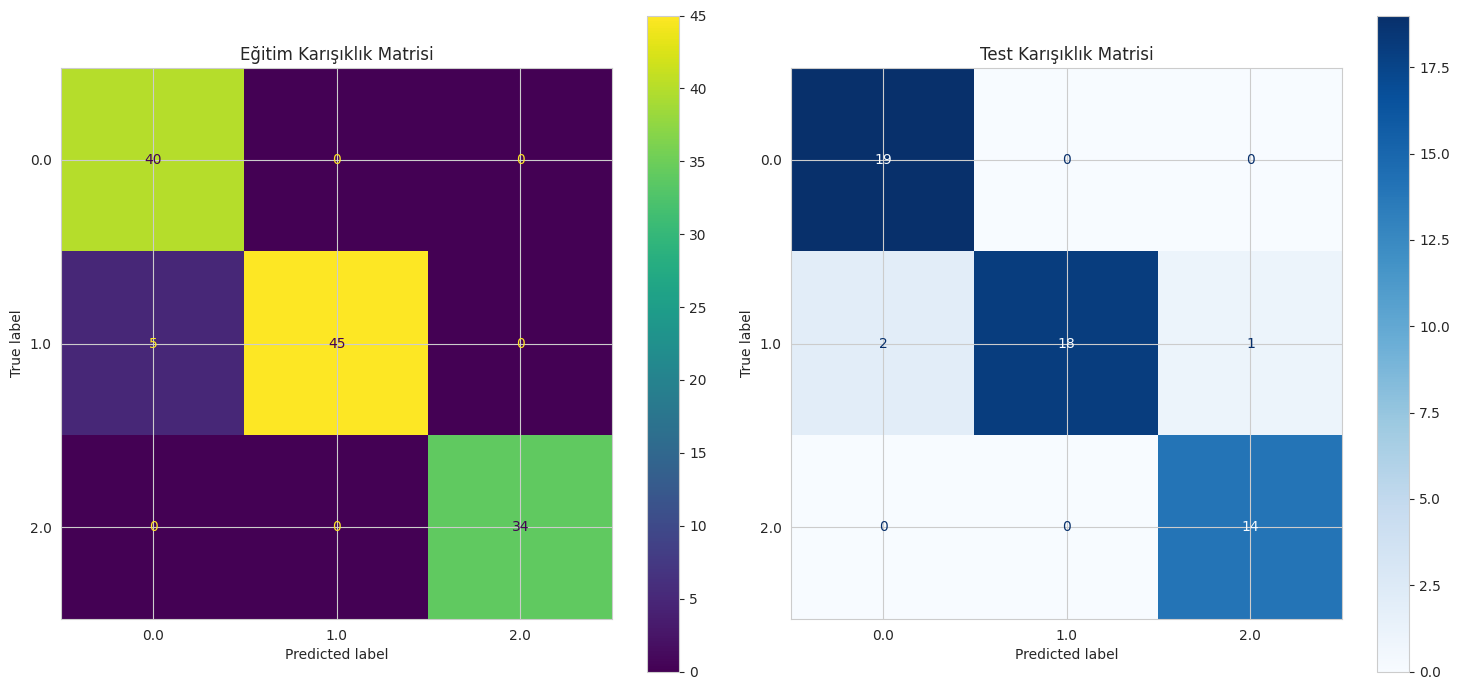

In [23]:


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, roc_curve, auc


egitim_karisik_matrisi = confusion_matrix(y_egitim, y_egitim_tahmin)
test_karisik_matrisi = confusion_matrix(y_test, y_test_tahmin)



fig, ax = plt.subplots(1, 2, figsize=(15, 7))


ConfusionMatrixDisplay.from_estimator(knn_model, X_egitim, y_egitim, ax=ax[0], cmap='viridis')
ax[0].set_title('Eğitim Karışıklık Matrisi')

ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, ax=ax[1], cmap='Blues')
ax[1].set_title('Test Karışıklık Matrisi')

plt.tight_layout()
plt.show()



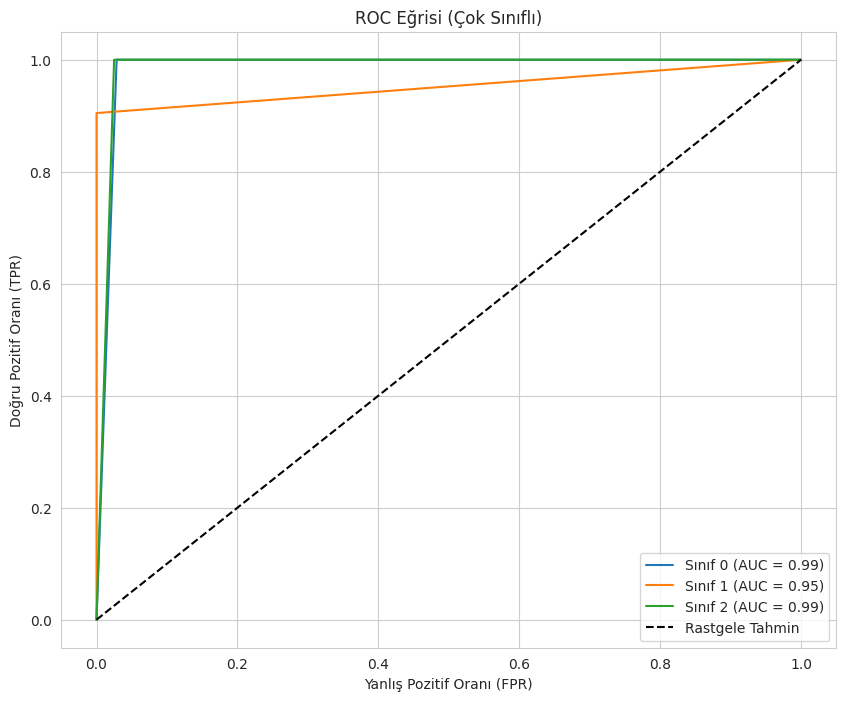

In [24]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

y_test_olasilik = knn_model.predict_proba(X_test)

plt.figure(figsize=(10, 8))

for i in range(len(knn_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, y_test_olasilik[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Sınıf {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin')
plt.title('ROC Eğrisi (Çok Sınıflı)')
plt.xlabel('Yanlış Pozitif Oranı (FPR)')
plt.ylabel('Doğru Pozitif Oranı (TPR)')
plt.legend(loc='lower right')
plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

parametre_ızgarası = {
    'n_neighbors': list(range(5, 31,2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


grid_arama = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=parametre_ızgarası,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    refit=True
)

grid_arama.fit(X_egitim, y_egitim)

en_iyi_parametreler = grid_arama.best_params_
en_iyi_skor = grid_arama.best_score_

print(f"En İyi Hiperparametreler: {en_iyi_parametreler}")
print(f"En İyi Çapraz Doğrulama Skoru: {en_iyi_skor:.2f}")


En İyi Hiperparametreler: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
En İyi Çapraz Doğrulama Skoru: 0.98


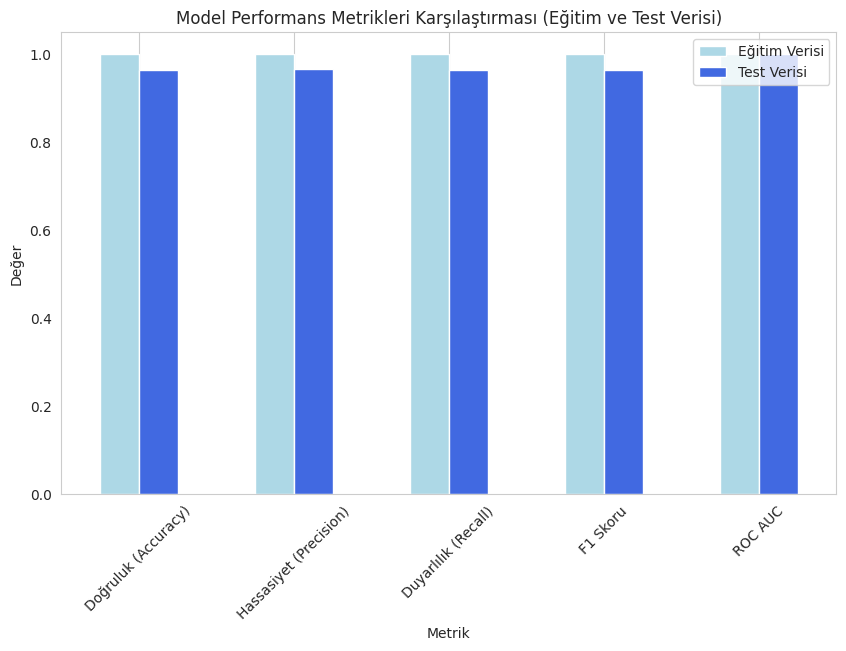

,Metrik,Eğitim Verisi,Test Verisi
0,Doğruluk (Accuracy),1.0,0.962963
1,Hassasiyet (Precision),1.0,0.966490
2,Duyarlılık (Recall),1.0,0.962963
3,F1 Skoru,1.0,0.962963
4,ROC AUC,1.0,1.000000


In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt


en_iyi_knn_model = KNeighborsClassifier(
    n_neighbors=55,
    weights='distance',
    metric='euclidean'
)


en_iyi_knn_model.fit(X_egitim, y_egitim)


tahmin_y_egitim = en_iyi_knn_model.predict(X_egitim)
tahmin_y_test = en_iyi_knn_model.predict(X_test)


optimize_hassasiyet_egitim = precision_score(y_egitim, tahmin_y_egitim, average="weighted")
optimize_duyarlilik_egitim = recall_score(y_egitim, tahmin_y_egitim, average="weighted")
optimize_f1_egitim = f1_score(y_egitim, tahmin_y_egitim, average="weighted")
optimize_roc_auc_egitim = roc_auc_score(y_egitim, en_iyi_knn_model.predict_proba(X_egitim), multi_class="ovr")
optimize_acc_egitim = accuracy_score(y_egitim, tahmin_y_egitim)

optimize_hassasiyet_test = precision_score(y_test, tahmin_y_test, average="weighted")
optimize_duyarlilik_test = recall_score(y_test, tahmin_y_test, average="weighted")
optimize_f1_test = f1_score(y_test, tahmin_y_test, average="weighted")
optimize_roc_auc_test = roc_auc_score(y_test, en_iyi_knn_model.predict_proba(X_test), multi_class="ovr")
optimize_acc_test = accuracy_score(y_test, tahmin_y_test)


metrik_karsilastirma = pd.DataFrame({
    'Metrik': ['Doğruluk (Accuracy)', 'Hassasiyet (Precision)', 'Duyarlılık (Recall)', 'F1 Skoru', 'ROC AUC'],
    'Eğitim Verisi': [optimize_acc_egitim, optimize_hassasiyet_egitim, optimize_duyarlilik_egitim, optimize_f1_egitim, optimize_roc_auc_egitim],
    'Test Verisi': [optimize_acc_test, optimize_hassasiyet_test, optimize_duyarlilik_test, optimize_f1_test, optimize_roc_auc_test]
})


metrik_karsilastirma.set_index('Metrik').plot(kind='bar', figsize=(10, 6), color=['lightblue', 'royalblue'])
plt.title('Model Performans Metrikleri Karşılaştırması (Eğitim ve Test Verisi)')
plt.ylabel('Değer')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

metrik_karsilastirma
